In [1]:
import config
import sys
sys.path.append('../util')
import os
from ultralytics import YOLO
from yoloutil import *

result_path = './yolo11'


In [ ]:
# convert_masks_to_yolo_txt(
#     input_dir=config.dataset_path,
#     class_names=["ulcer"]
# )

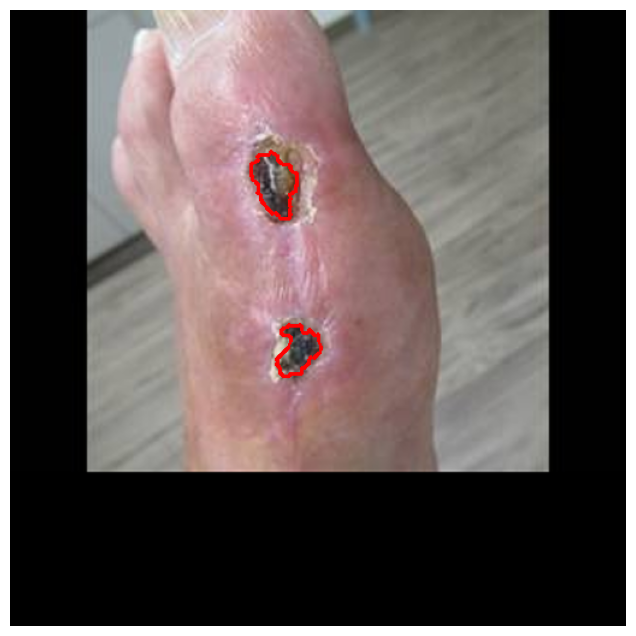

In [3]:
image_path = f"{config.dataset_path}/images/test/0504.png"
txt_path   = f"{config.dataset_path}/labels/test/0504.txt"

show_yolo_annotation(image_path, txt_path)


In [ ]:
model = YOLO("yolo11n-seg.pt")

results = model.train(data=f"{config.dataset_path}/data.yaml", 
                      epochs=300, 
                      imgsz=224, 
                      patience=20, 
                      project=result_path)

os.system('play -nq -t alsa synth 0.2 sine 600; play -nq -t alsa synth 0.2 sine 600')

In [ ]:
model = YOLO(f"{result_path}/train/weights/best.pt")

In [ ]:
import config
from DatasetReader import get_datasets


_, test_loader, _ = get_datasets(dataset_dir=config.dataset_path, 
                                resolution=config.dataset_resolution, 
                                batch_size=config.batch_size)

metrics = evaluate_yolo_segmentation(model, test_loader, num_classes=config.num_classes)
print(metrics)



Evaluating YOLO Segmentation: 100%|██████████| 7/7 [00:01<00:00,  4.47it/s]

{'Dice': 0.73, 'mIoU': 0.622, 'Precision': 0.707, 'Recall': 0.828, 'F1': 0.73}


In [ ]:
fps, time_per_image, cpu_fps, cpu_time_per_image = measure_inference_speed(model, test_loader)
print("FPS:",fps, "Time per image:",time_per_image)
print("FPS:",cpu_fps, "Time per image:",cpu_time_per_image)


image 1/1 /mnt/TUDAO/DocNanoNet/foot-ulcer/datasets/Foot Ulcer Segmentation Challenge_v2-yolov11-seg/images/test/0504.png: 224x224 2 ulcers, 9.7ms
Speed: 0.6ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)


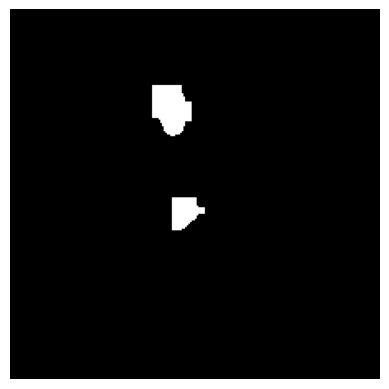

In [12]:
%matplotlib inline
# carregar o modelo treinado
mask = yolo_get_mask(model, f"{yolo_dataset_path}/images/test/0504.png", show=True)

In [ ]:
model.info(verbose=True)

YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 9.6 GFLOPs


(113, 2834763, 0, 9.5717888)